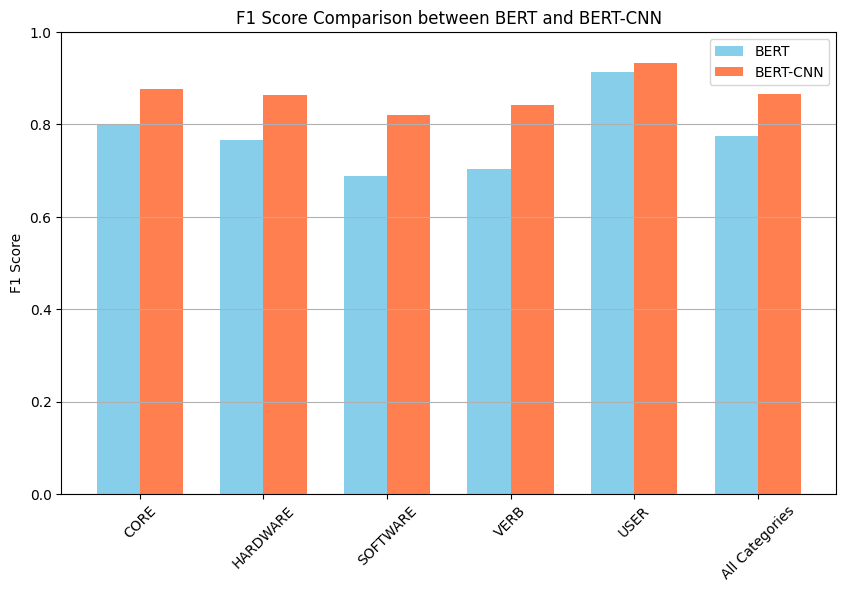

In [14]:
import matplotlib.pyplot as plt

# Data
categories = ["CORE", "HARDWARE", "SOFTWARE", "VERB", "USER", "All Categories"]
bert_scores = [0.801, 0.767, 0.688, 0.703, 0.913, 0.774]
bert_cnn_scores = [0.877, 0.863, 0.821, 0.843, 0.932, 0.867]

x = range(len(categories))
# Plot
plt.figure(figsize=(10, 6))
plt.bar(x, bert_scores, width=0.35, label='BERT', color='skyblue') 
plt.bar([p + 0.35 for p in x], bert_cnn_scores, width=0.35, label='BERT-CNN', color='coral')  # Plot BERT-CNN scores with slight offset

plt.title('F1 Score Comparison between BERT and BERT-CNN')
plt.xticks([p + 0.175 for p in x], categories, rotation=45)  # Set x-axis ticks with category labels and rotation for better readability
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')  # Grid on y-axis only for bar charts
plt.show()

In [26]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [27]:
requirements = [
    "The system has capability to have voice recognition",
    "The implementation shall run on the Windows platform in the Eclipse 3.3 environment",
    "The product shall provide Monitoring Services",
    "The solution should support load balancing across servers"
]

In [28]:

# for requirement in requirements:
#     doc = nlp(requirement)
#     filtered_words = [token.text for token in doc if not token.is_stop]
#     for word in filtered_words:
#         position_token = next(token for token in doc if token.text == "system")
#         start = position_token.idx
#         end = start + len(position_token.text)

In [29]:
objs = [{
  "text": "The system has capability to have voice recognition",
  "ents": [{ "start": 4, "end": 10, "label": "CORE" }, {"start": 29, "end": 34, "label": "VERB"}, {"start": 34, "end": 51, "label": "CORE"}]
},
{
  "text": "The implementation shall run on the Windows platform in the Eclipse 3.3 environment",
  "ents": [{ "start": 4, "end": 18, "label": "CORE" }, {"start": 25, "end": 28, "label": "VERB"}, {"start": 36, "end": 52, "label": "SOFTWARE"}, {"start": 59, "end": 83, "label": "SOFTWARE"}]
},
{
  "text": "The product shall provide Monitoring Services",
  "ents": [{ "start": 4, "end": 11, "label": "CORE" },{ "start": 18, "end": 25, "label": "VERB" },{ "start": 26, "end": 45, "label": "CORE" } ]
},
{
  "text": "The solution should support load balancing across servers",
  "ents": [{ "start": 4, "end": 12, "label": "CORE" }, { "start": 20, "end": 27, "label": "VERB" }, { "start": 28, "end": 42, "label": "CORE" }, { "start": 50, "end": 57, "label": "HARDWARE" } ]
}]
for obj in objs:
  html = displacy.render(obj, style="ent", manual=True, jupyter=False)
  print(html)

<div class="entities" style="line-height: 2.5; direction: ltr">The 
<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">
    system
    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">CORE</span>
</mark>
 has capability to 
<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">
    have 
    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">VERB</span>
</mark>

<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">
    voice recognition
    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">CORE</span>
</mark>
</div>
<di

In [30]:
object = [{
  "text": "The system has capability to have voice recognition",
  "ents": [{ "start": 4, "end": 10, "label": "CORE" }, {"start": 29, "end": 34, "label": "VERB"}, {"start": 34, "end": 39, "label": "CORE"}, {"start": 40, "end": 51, "label": "CORE"}]
}]

for obj in object:
    t_end = 0
    t_label = ""
    for idx, ent in enumerate(obj['ents']):
       if ent['start'] - t_end == 1 and ent['label'] == t_label:
          prev_ent = obj["ents"][idx-1]
          obj['ents'].pop(idx-1)
          ent['start'] = prev_ent['start']
       t_end = ent['end']
       t_label = ent['label']

for obj in object:
  displacy.render(obj, style="ent", manual=True)